# Python Coding and Data Set
Load in the data file and header file provided

In [60]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

# Define base directory
basedir='D:/David/GA/'

# Load data
d = pd.read_csv(''.join([basedir+'breast-cancer.csv']))

# Load header
file = open(''.join([basedir+'field_names.txt']), 'r')
data = file.read()
header=data.split('\n')

# Attach header to the dataframe 
df=pd.DataFrame(d.values, columns = header)

#Looking unique values
print(df.nunique())
#Looking the data
print(df.head())


ID                            568
diagnosis                       2
radius_mean                   456
radius_sd_error               478
radius_worst                  521
texture_mean                  538
texture_sd_error              473
texture_worst                 536
perimeter_mean                536
perimeter_sd_error            542
perimeter_worst               431
area_mean                     498
area_sd_error                 539
area_worst                    518
smoothness_mean               532
smoothness_sd_error           527
smoothness_worst              547
compactness_mean              540
compactness_sd_error          532
compactness_worst             506
concavity_mean                497
concavity_sd_error            544
concavity_worst               456
concave_points_mean           510
concave_points_sd_error       514
concave_points_worst          543
symmetry_mean                 410
symmetry_sd_error             528
symmetry_worst                538
fractal_dimens

Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this. We can use barplots for comparing these values across the tumor types.

Text(0.5, 1.0, 'The mean and median for the smoothness_mean of malignant tumors are 215.15% larger\n and 197.41% larger than that of benign tumors respectively')

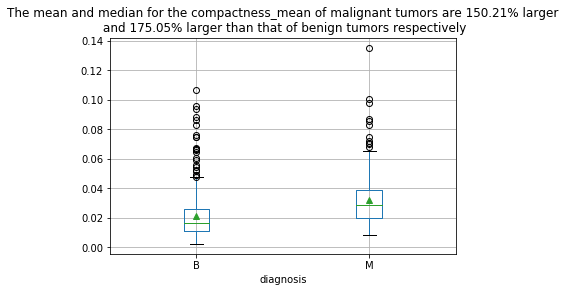

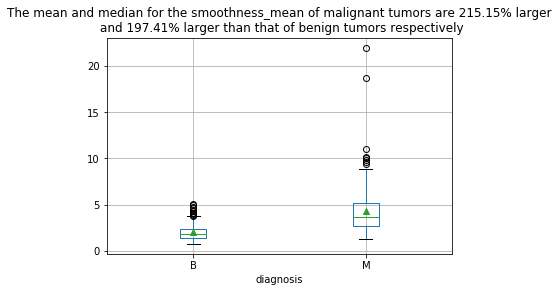

In [61]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
from statistics import mean # for mean
from statistics import median # for median
from decimal import Decimal # for rounding off decimals

#Function to get the title for a plot
def getTitle(df,comparison):
    MvalA=[] 
    BvalA=[]
    Mval=mean(df[df["diagnosis"]=='M'][comparison])
    Bval=mean(df[df["diagnosis"]=='B'][comparison])
    MvalA.append(Mval)
    BvalA.append(Bval)
    Mval=median(df[df["diagnosis"]=='M'][comparison])
    Bval=median(df[df["diagnosis"]=='B'][comparison])
    MvalA.append(Mval)
    BvalA.append(Bval)

    per=[]
    term=[]
    for i in range(0,2):
        per.append(round(Decimal(100*MvalA[i]/BvalA[i]),2))
        term_="larger"
        if MvalA[i] <BvalA[i] :
            term_="smaller"
        term.append(term_)       
    title=''.join('The mean and median for the '+comparison+' of malignant tumors are '+str(per[0])+'% '+term[0])
    title=title+'\n and '+str(per[1])+'% '+term[1]+' than that of benign tumors respectively'
    return(title)

#Plotting of compactness_mean to compare across diagnosis
ax=df.boxplot(column = 'compactness_mean', by = 'diagnosis',showmeans=True);
plt.suptitle("")
ax.set_title(getTitle(df,'compactness_mean'))

#Plotting of smoothness_mean to compare across diagnosis
ax=df.boxplot(column = 'smoothness_mean', by = 'diagnosis',showmeans=True);
plt.suptitle("")
ax.set_title(getTitle(df,'smoothness_mean'))

The conclusion is the mean and median smoothness and compactness of malignant tumors are at least a 150% or 1.5 times larger than that for benign tumors. 

Write a function to generate bootstrap samples of the data.

In [62]:
#Create function to bootstrap
def bootstrap(df):
    return(df.iloc[np.random.randint(df.shape[0], size=df.shape[0])])

#Using the boostrap function to generate a new dataframe boostrapped from the orignal dataframe
df_bootstrap=bootstrap(df)

#Looking a few unique values to verify if the boostrapped dataframe is indeed different 
print("Some unique values of actual dataframe")
print(df.nunique().head())
print("\nSome unique values of boostrapped dataframe")
print(df_bootstrap.nunique().head())

Some unique values of actual dataframe
ID                 568
diagnosis            2
radius_mean        456
radius_sd_error    478
radius_worst       521
dtype: int64

Some unique values of boostrapped dataframe
ID                 366
diagnosis            2
radius_mean        318
radius_sd_error    328
radius_worst       342
dtype: int64


# Exploratory Analysis

Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.

In [63]:
from sklearn.feature_selection import SelectKBest #used with a suite of different statistical tests to select a specific number of features.
from sklearn.feature_selection import chi2 #the chosen statistical test to be used in conjunction with SelectKBest

#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)

X = df.iloc[:,2:df.shape[1]]  #independent columns
y = df.iloc[:,1]      #target column i.e diagnosis

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variable','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

                Variable          Score
23  concave_points_worst  111784.794951
3           texture_mean   53859.312568
13   smoothness_sd_error    8646.030808


The top 3 predictors for malignant tumor are concave_points_worst, texture_mean and smoothness_sd_error. The boxplots of these features across the two tumor types are shown below.

In [64]:
#Create function to create a nicer interactive boxplot (than pandas) a feature for malignant vs benign tumors
def feature_box(df,feature):
    trace0 = go.Box(
        y=df[df["diagnosis"]=='M'][feature],
        x=df[df["diagnosis"]=='M']['diagnosis'],
        name='Malignant',
        marker=dict(
            color='#3D9970'
        ),
        boxmean=True
        
    )

    trace1 = go.Box(
        y=df[df["diagnosis"]=='B'][feature],
        x=df[df["diagnosis"]=='B']['diagnosis'],
        name='Benign',
        marker=dict(
            color='#FF4136'
        ),
        boxmean=True
    )

    data = [trace0, trace1]

    layout = go.Layout(
        yaxis=dict(
            title=feature,
            zeroline=False
        ),
        xaxis=dict(
            title='Tumor Type'
        ),
        boxmode='group',
        title=''.join(feature+' (Malignant vs Benign)')
    )
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='box-tumor-type')

#visualize the top feature
feature_box(df,'concave_points_worst')

In [65]:
#visualize the 2nd top feature
feature_box(df,'texture_mean')

In [66]:
#visualize the 3rd top feature
feature_box(df,'smoothness_sd_error')

# Modelling
Build a model to predict the malignant tumors.
Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
Identify how you would control for overfitting in each classification technique.
Evaluate the performance of each model.
In each model, identify the most important predictive variables and explain how you identified them.

In [67]:
#Preparing the data for modelling
from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #To evaluate our model

from sklearn.model_selection import GridSearchCV

# We would be only trying random forest and GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
# integer encode the class variable
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)


# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X,integer_encoded, test_size = 0.3, random_state=7)


D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



# Model 1: Random forest

### Advantages :
    
    1) Its advantages over using a single decision tree are 
        a) Random forest overcomes overfitting by averaging or combining the results of different decision trees.
        b) Random forest has less variance than a single decision tree and hence can work well for a larger range of data items than a single decision tree.
        
    2. Random forests are extremely flexible and have very high accuracy.
  
    3. Minimal preparation of the input data is required. 
        a. You do not have to scale the data.
        b. It also maintains accuracy even when a large proportion of the data are missing.

### Disadvantages:

    1) Complexity 
        a) Modelling and prediction are both more time consuming than decision trees.
        b) Difficult to understand the relationship between data features as it is a large collection of decision trees.
        
### Control for overfitting:

    1)Using more trees as defined via the n_estimators. The more trees we try, the less likely it is to overfit.
    2)Using less features as defined via max_features which would allow a more general model to surface. Since we have 30 features, using no more than 20 would allow a more generalitic model to be created and hence allowing less overfitting.
    3)Using smaller values of max_depth would also reduce overfitting.
    4)The model performance was evaluated using an external dataset (a dataset that was not used for training).

In [68]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.967741935483871, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.9032258064516129, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.9333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.7666666666666667, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.9333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.9, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.9354838709677419, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.7333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, 

[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.9, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.7, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.9333333333333333, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.9032258064516129, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.9666666666666667, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.

[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.7666666666666667, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_estimators=50, score=1.0, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_estimators=50, score=0.9354838709677419, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_e

[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.6666666666666666, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.9, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.9666666666666667, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.7, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.9

[CV]  max_depth=7, max_features=4, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.8, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=1.0, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.93548387

[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.9, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.7, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.9

[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.9, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10, max_features=4, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.8, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=1.0

[CV]  max_depth=10, max_features=15, n_estimators=10, score=0.8666666666666667, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.7, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_es

[CV]  max_depth=None, max_features=4, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.8, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=1.0, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators

[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.6666666666666666, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.8666666666666667, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=1.0, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.967741935483871, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.9333333333333333, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.7, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_fea

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   42.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 10, None], 'n_estimators': [3, 5, 10, 25, 50, 150], 'max_features': [4, 7, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=4)

In [76]:
print(grid_search.best_score_) #Print the best recall
print(grid_search.best_params_) #Print the best parameter


0.9338019013569514
{'max_depth': 7, 'max_features': 20, 'n_estimators': 50}


7

In [77]:
#use the best params above to create a random forest classifier
rf = RandomForestClassifier(max_depth=grid_search.best_params_.get('max_depth'), max_features=grid_search.best_params_.get('max_features'), 
                            n_estimators=grid_search.best_params_.get('n_estimators'), random_state=2)

#training with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [78]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Performance of the model
print(accuracy_score(y_test,y_pred))
print("\n")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_test, y_pred))

0.9649122807017544


Predicted    0   1  All
True                   
0          109   3  112
1            3  56   59
All        112  59  171


             precision    recall  f1-score   support

          0       0.97      0.97      0.97       112
          1       0.95      0.95      0.95        59

avg / total       0.96      0.96      0.96       171



Identify the most important predictive variables and explain how you identified them

Text(0.5, 0, 'Relative Importance')

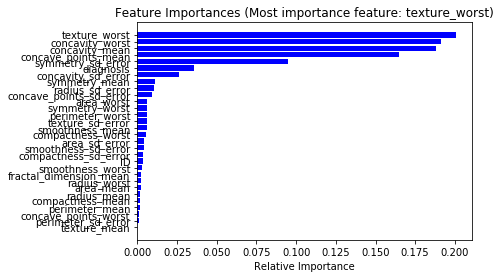

In [79]:
#Plot the features in terms of decreasing importances highlighting the most important feature
importances = rf.feature_importances_
indices = np.argsort(importances)

features=df.columns

plt.figure(1)
plt.title('Feature Importances (Most importance feature: '+features[indices][len(indices)-1]+')')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Model 2: GaussianNB

### Advantages:
    1) Computationally fast
    2) Simple to implement
    3) Works well with high dimensions
    
### Disadvantages:
    1)Relies on independence assumption and will perform badly if this assumption is not met
    
### Control for overfitting: 
    1)The model performance was evaluated using an external dataset (a dataset that was not used for training)    

In [80]:
#Creating the classifier
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [81]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.9370277078085643


In [82]:
#Testing the model 
#Predicting using our  model
y_pred = model.predict(X_test)

# Performance of the model
print(accuracy_score(y_test,y_pred))
print("\n")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print(classification_report(y_test, y_pred))

0.9473684210526315


Predicted    0   1  All
True                   
0          112   0  112
1            9  50   59
All        121  50  171


             precision    recall  f1-score   support

          0       0.93      1.00      0.96       112
          1       1.00      0.85      0.92        59

avg / total       0.95      0.95      0.95       171



It is not possible to identify feature importances in a Gaussian Naive Bayes model

# Explanation

### To Technical Audiences
Explain the limitations of your analysis and identify possible further steps you could take.

    1) We did not perform normalization of the data which could improve the performance of the GaussianNB as it would make every datapoint have the same scale so each feature is equally important.
    2) We did not derive additional features from the existing features which could be more predictive and further improve the model's performance for both Random Forest and GaussianNB.
    3) We could have tried additional methods to further reduce the overfitting in the Random Forest model by specifying another tuning parmater, min_samples_leaf and setting a larger value for range of values to be tuned

### To Non-Technical Audiences
Write a short summary of your analysis, explaining how your model works and how it performs.
Briefly explain the factors that contributed to malignant vs benign tumor identification.

    In summary, Random Forest is better at identifying malignant cases as it correctly identified 6 more malignant cases than GaussianNB. However, it also wrongly classified 3 more benign cases as malignant compared to GuassianNB. If it is more critical to not miss identification of malignant cases, Random Forest would be prefered although there might be a small proportion of false positives.

    For individual features "concave_points_worst" is the most predictive with malignant have a higher value. However for the random forest model, the "concave_points_worst" appeared to be 3rd least important feature. Hence features contributing to the identification of malignant vs benign is highly associated with the model adopted and can vary across models.